In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od
import zipfile
import os

In [ ]:
!pip install opendatasets

In [ ]:
df = pd.read_excel("task 05.xlsx")

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.shape

(12316, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [ ]:
df.describe(include=object)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
#Dropping the columns with huge number of null values
if all(col in df.columns for col in ['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)']):
    df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)
    print("Columns dropped successfully.")
else:
    print("One or more of the specified columns do not exist in the DataFrame.")
categorical=[i for i in df.columns if df[i].dtype=='O']
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)
columns_to_drop = ['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(columns=[col], axis=1, inplace=True)
        print(f"Column '{col}' dropped successfully.")
    else:
        print(f"Column '{col}' not found in DataFrame.")
df.isna().sum()

One or more of the specified columns do not exist in the DataFrame.
Column 'Wind_Speed(mph)' not found in DataFrame.
Column 'Visibility(mi)' not found in DataFrame.
Column 'Pressure(in)' not found in DataFrame.
Column 'Humidity(%)' not found in DataFrame.
Column 'Temperature(F)' not found in DataFrame.


Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [ ]:
df.duplicated().sum()

0

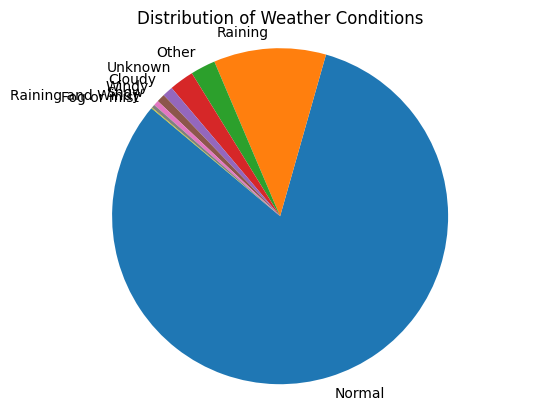

In [ ]:
#Weather Condition
counts = df['Weather_conditions'].value_counts()
plt.pie(counts.values, labels=counts.index, startangle=140)
plt.title('Distribution of Weather Conditions')
plt.axis('equal')
plt.show()

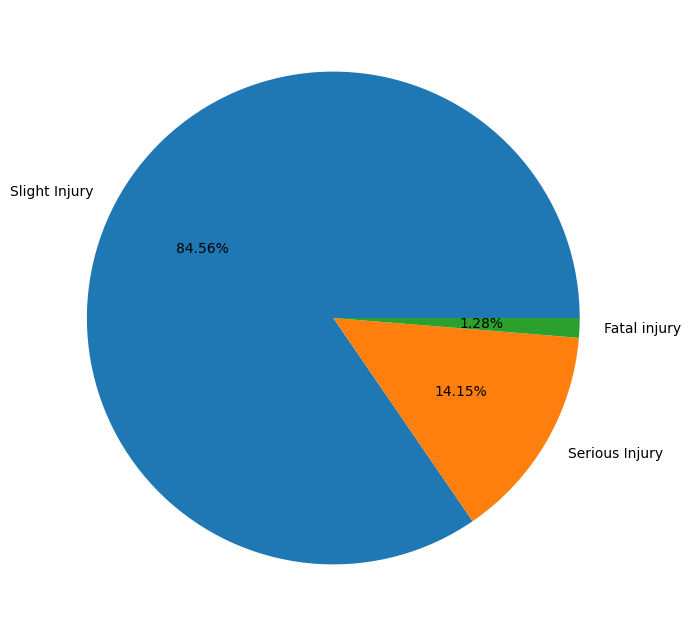

In [ ]:
#Accident_severity' column
labels = df['Accident_severity'].value_counts().index
plt.figure(figsize=(8,8))
plt.pie(df['Accident_severity'].value_counts(), labels=labels, autopct="%1.2f%%")
plt.show()

In [ ]:
#EDA of type of vehicle
Type_of_vehicle_acc = df['Type_of_vehicle'].value_counts().sort_values(ascending = False).reset_index()
Type_of_vehicle_acc

,Type_of_vehicle,count
0,Automobile,4155
1,Lorry (41?100Q),2186
2,Other,1208
3,Pick up upto 10Q,811
4,Public (12 seats),711
5,Stationwagen,687
6,Lorry (11?40Q),541
7,Public (13?45 seats),532
8,Public (> 45 seats),404
9,Long lorry,383


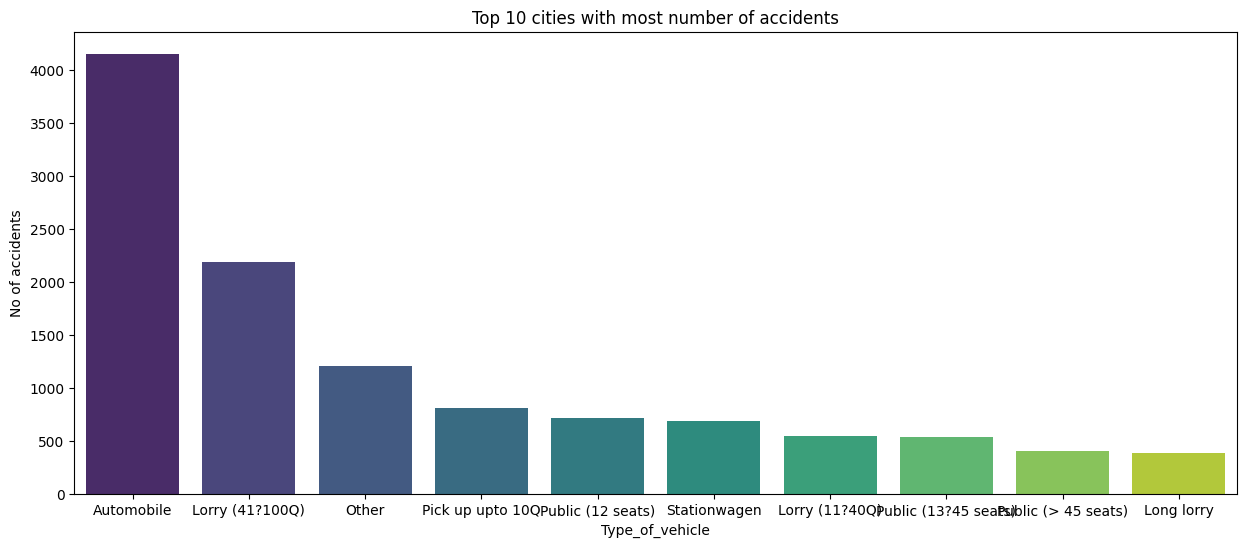

In [ ]:
#Top 10 cities with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='Type_of_vehicle',y='count',data=Type_of_vehicle_acc.head(10),palette='viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

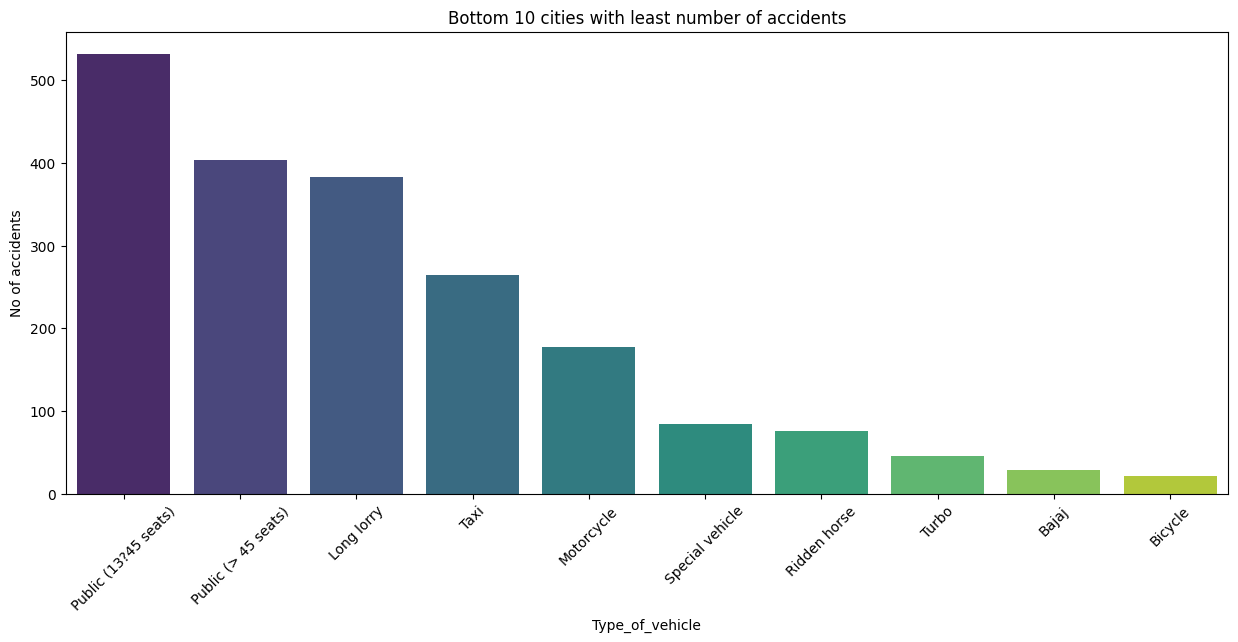

In [ ]:
#Bottom 10 cities with least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='Type_of_vehicle',y='count',data= Type_of_vehicle_acc.tail(10),palette='viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

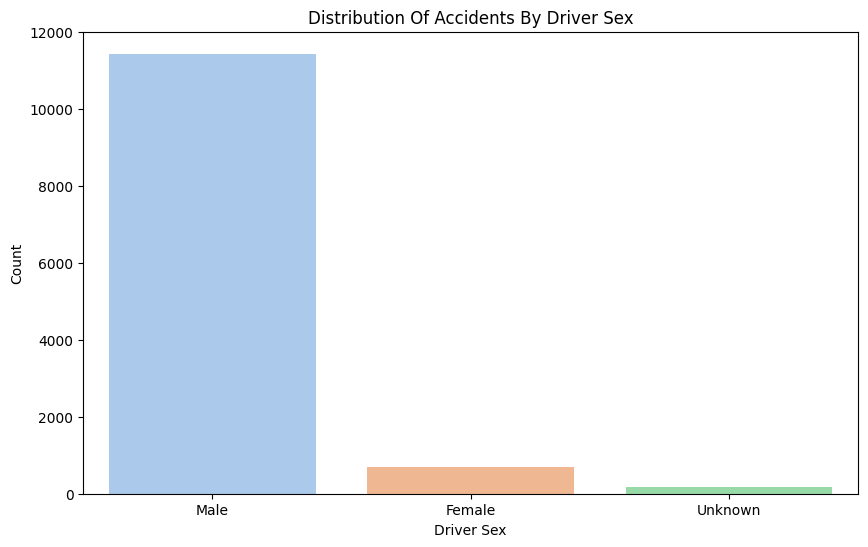

In [ ]:
#sex of driver
plt.figure(figsize=(10,6))
sns.countplot(x='Sex_of_driver', data=df, palette='pastel',hue='Sex_of_driver', legend=False )
plt.title('Distribution Of Accidents By Driver Sex')
plt.xlabel('Driver Sex')
plt.ylabel('Count')
plt.show()

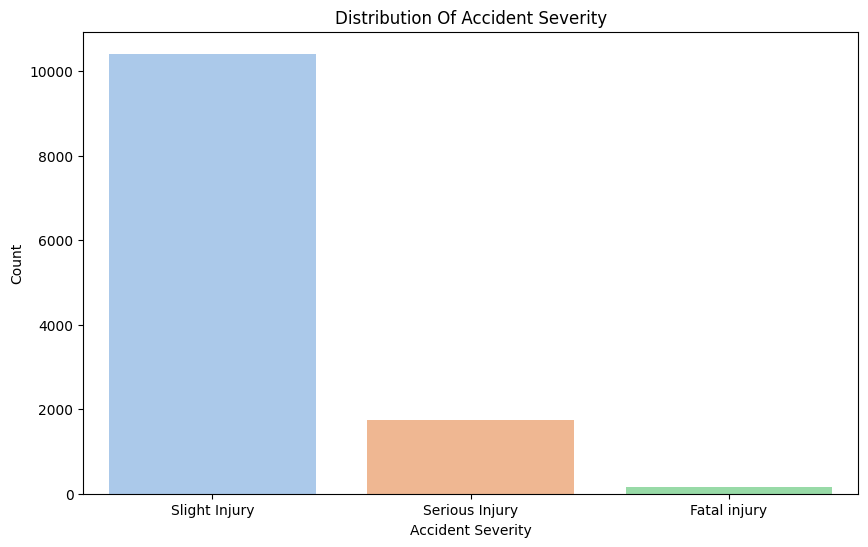

In [ ]:
#severity of accident
plt.figure(figsize=(10,6))
sns.countplot(x='Accident_severity', data=df, palette='pastel', hue='Accident_severity', legend=False)
plt.title('Distribution Of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

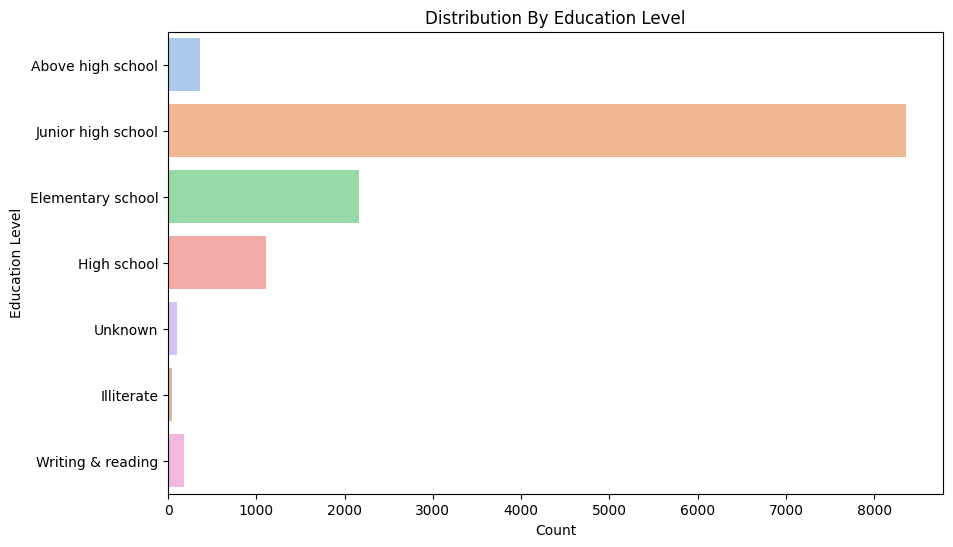

In [ ]:
#education using histogram
plt.figure(figsize=(10,6))
sns.countplot(y='Educational_level', data=df, palette='pastel', hue='Educational_level',legend=False)
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Distribution By Education Level')
plt.show()

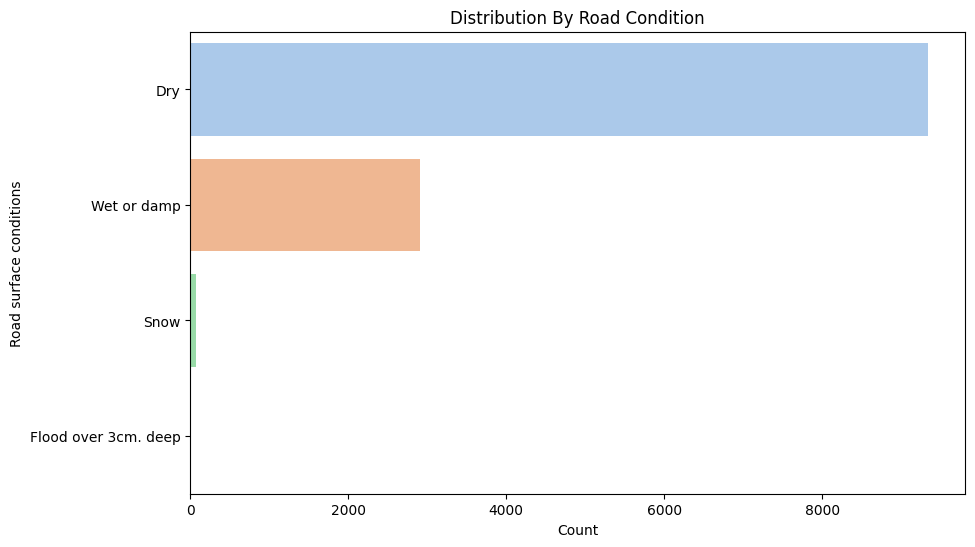

In [ ]:
#road condition
plt.figure(figsize=(10,6))
sns.countplot(y='Road_surface_conditions', data=df, palette='pastel', hue='Road_surface_conditions',legend=False)
plt.xlabel('Count')
plt.ylabel('Road surface conditions')
plt.title('Distribution By Road Condition')
plt.show()

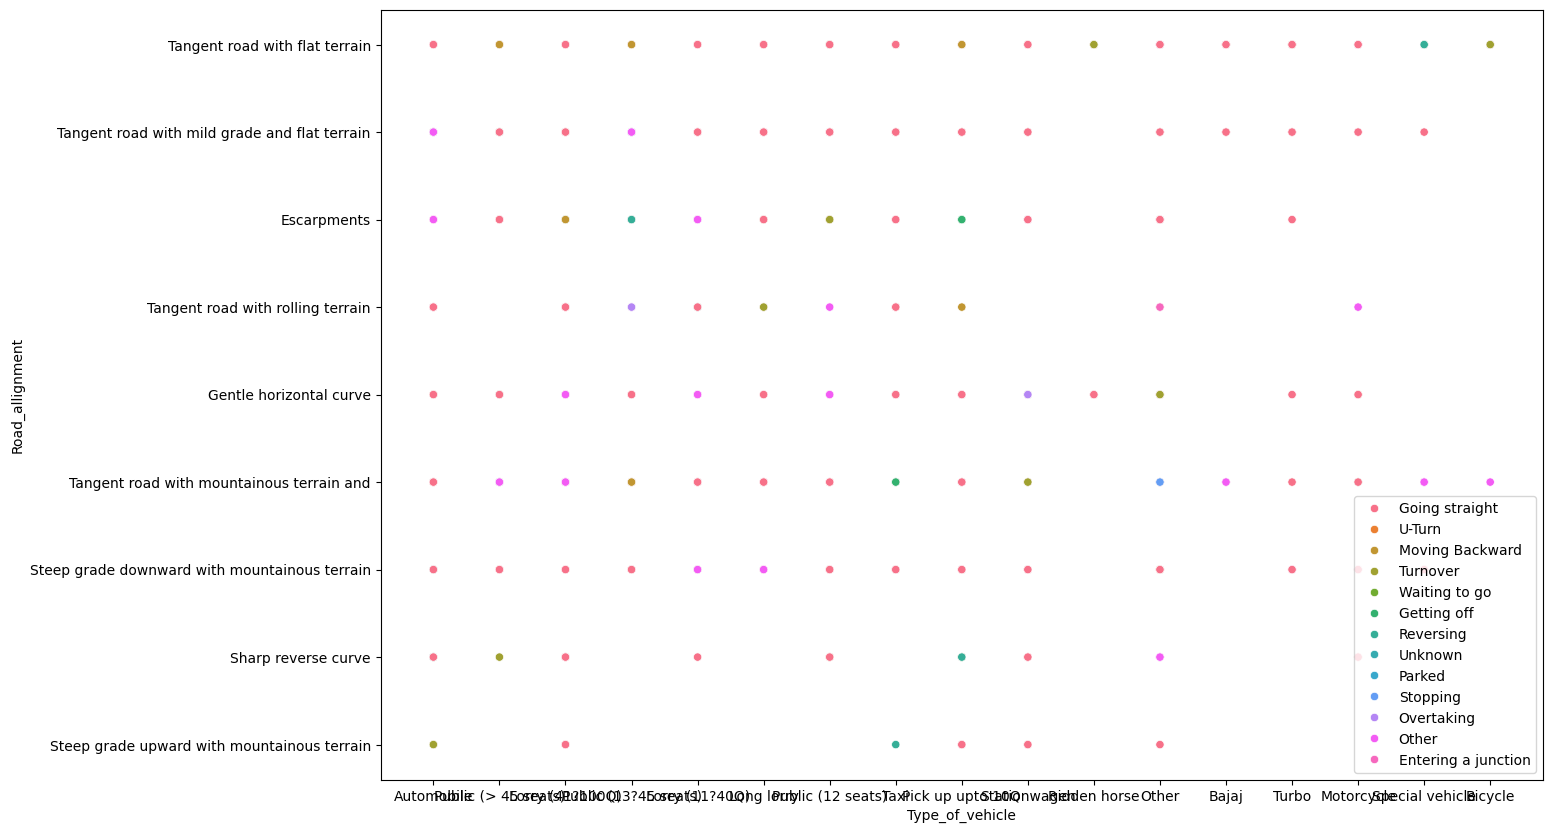

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Type_of_vehicle'],y=df['Road_allignment'],hue=df['Vehicle_movement']) # Removed extra space after Road_allignment and Vehicle_movement
plt.legend(loc="lower right")
plt.show()